In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy.stats import norm
from IPython.display import Image 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import MinMaxScaler

In [2]:
Faltante_gondola = pd.read_excel(r'C:\Users\gabri\Desktop\Ciencia de datos\Faltante gondola.xlsx')

In [3]:
Faltante_gondola.head()

,Unnamed: 0,Unnamed: 0.1,IDRENGLON,ID_MUESTRA,CODIGO_EAN,MARCA,ID_VALIDO,STOCK_CD,PROVEEDOR,CADENA,...,ENTREGA,IDALMACEN,FECHA_RELGS1,ANIO,LECTURA,DIASEMANAL,QUIEBRE,CAT2,CAT3,SUB_CAT3
0,0,0,1588433,11131,Producto 279,Marca 1662,0,1036,Proveedor 217,Cadena 5,...,CENTRALIZADA ...,S,2019-05-20,2019,1,Lunes,0,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
1,1,1,1588434,11131,Producto 281,Marca 1662,0,1176,Proveedor 217,Cadena 5,...,CENTRALIZADA ...,S,2019-05-20,2019,2,Lunes,0,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
2,2,2,1588435,11131,Producto 285,Marca 1662,0,1188,Proveedor 217,Cadena 5,...,CENTRALIZADA ...,S,2019-05-20,2019,1,Lunes,0,SNACK PAPAS FRITAS,ALIMENTOS,SECOS
3,3,3,1588436,11131,Producto 999,Marca 1459,0,192,Proveedor 66,Cadena 5,...,CENTRALIZADA ...,X,2019-05-20,2019,1,Lunes,0,CREMA CORPORAL Y MANOS,HIGIENE PERSONAL,HIGIENE PERSONAL
4,4,4,1588437,11131,Producto 359,Marca 1334,0,1656,Proveedor 279,Cadena 5,...,CENTRALIZADA ...,S,2019-05-20,2019,1,Lunes,0,FIDEOS SECOS,ALIMENTOS,SECOS


In [4]:
Categoria_panificados= Faltante_gondola.loc[(Faltante_gondola.CAT2 == "PAN LACTAL") | (Faltante_gondola.CAT2 == "PAN HAMBURGUESAS") | (Faltante_gondola.CAT2 == "PAN PANCHOS") | (Faltante_gondola.CAT2 == "PAN OTROS")] 

In [5]:
np.shape (Categoria_panificados)

(1756, 23)

In [6]:
Categoria_panificados.isnull().any()

Unnamed: 0      False
Unnamed: 0.1    False
IDRENGLON       False
ID_MUESTRA      False
CODIGO_EAN      False
MARCA           False
ID_VALIDO       False
STOCK_CD        False
PROVEEDOR       False
CADENA          False
ZONA            False
C_TAMANIO       False
IDROTACION      False
ENTREGA         False
IDALMACEN       False
FECHA_RELGS1    False
ANIO            False
LECTURA         False
DIASEMANAL      False
QUIEBRE         False
CAT2            False
CAT3            False
SUB_CAT3        False
dtype: bool

In [7]:
quiebre_pan= Categoria_panificados.loc[Categoria_panificados['QUIEBRE']==1]

In [8]:
Rotacionpan=(Categoria_panificados[['IDROTACION', 'IDRENGLON']].groupby(['IDROTACION']).count()).sort_values(by='IDRENGLON',ascending= False)
Rotacionpan['Rot_quiebre']=(quiebre_pan[['IDROTACION', 'QUIEBRE']].groupby(['IDROTACION']).count()).sort_values(by='QUIEBRE',ascending= False)
total_rotacion_pan=Rotacionpan['IDRENGLON'].sum()
porcentaje_rot_total_pan=(Rotacionpan['IDRENGLON']/total_rotacion_pan)*100
Rotacionpan['Porcentaje_total']=porcentaje_rot_total_pan
total_rotacion_quiebre_pan=Rotacionpan['Rot_quiebre'].sum()
porcentaje_rot_quiebre_pan=(Rotacionpan['Rot_quiebre']/total_rotacion_quiebre_pan)*100
Rotacionpan['Porcentaje_quiebre']=porcentaje_rot_quiebre_pan
Rotacionpan['Quiebre/Total']=(Rotacionpan['Rot_quiebre']/Rotacionpan['IDRENGLON'])*100
Rotacionpan.head(5)

,IDRENGLON,Rot_quiebre,Porcentaje_total,Porcentaje_quiebre,Quiebre/Total
IDROTACION,,,,,
A,1383,237,78.758542,70.535714,17.136659
B,317,79,18.052392,23.511905,24.921136
C,56,20,3.189066,5.952381,35.714286


In [9]:
Quiebre = Faltante_gondola.loc[Faltante_gondola['QUIEBRE']==1]
quiebrestotales= round(((Quiebre['IDRENGLON'].count())/(Faltante_gondola['IDRENGLON'].count()))*100,2) 
quiebrespani=round(((quiebre_pan['IDRENGLON'].count())/(Categoria_panificados['IDRENGLON'].count()))*100,2) 
print(f'Sobre el total de muestras el {quiebrestotales}% son muestras con quiebre\r\n')
print(f'En cambio, sobre la categoría panificados el {quiebrespani}% de las muestras están quebradas\r\n')

Sobre el total de muestras el 8.76% son muestras con quiebre

En cambio, sobre la categoría panificados el 19.13% de las muestras están quebradas



In [10]:
Zonas_pani=(Categoria_panificados[['ZONA', 'IDRENGLON']].groupby(['ZONA']).count()).sort_values(by='IDRENGLON',ascending= False)
Zonas_pani['Zonas_quiebre']=(quiebre_pan[['ZONA', 'QUIEBRE']].groupby(['ZONA']).count()).sort_values(by='QUIEBRE',ascending= False)
Zonas_pani['Quiebre/Total']=(Zonas_pani['Zonas_quiebre']/Zonas_pani['IDRENGLON'])*100

In [11]:
Zonas_pani.sort_values(by='Quiebre/Total',ascending=False)

,IDRENGLON,Zonas_quiebre,Quiebre/Total
ZONA,,,
SANTA ROSA,28,23.0,82.142857
SALTA,46,22.0,47.826087
VIEDMA,28,12.0,42.857143
TUCUMAN,70,29.0,41.428571
CORDOBA,184,62.0,33.695652
NEUQUEN,60,19.0,31.666667
GRAL. ROCA,52,14.0,26.923077
C RIVADAVIA,34,7.0,20.588235
GBA,426,82.0,19.248826


In [12]:
Cadena_pani=(Categoria_panificados[['CADENA', 'IDRENGLON']].groupby(['CADENA']).count()).sort_values(by='IDRENGLON',ascending= False)
Cadena_pani['Cadena_quiebre']=(quiebre_pan[['CADENA', 'QUIEBRE']].groupby(['CADENA']).count()).sort_values(by='QUIEBRE',ascending= False)
Cadena_pani['Quiebre/Total']=(Cadena_pani['Cadena_quiebre']/Cadena_pani['IDRENGLON'])*100

In [13]:
Cadena_pani.sort_values(by='Quiebre/Total',ascending=False)

,IDRENGLON,Cadena_quiebre,Quiebre/Total
CADENA,,,
Cadena 1,388,173.0,44.587629
Cadena 3,106,29.0,27.358491
Cadena 13,378,75.0,19.841270
Cadena 10,132,24.0,18.181818
Cadena 2,152,19.0,12.500000
Cadena 0,215,16.0,7.441860
Cadena 4,264,NaN,NaN
Cadena 7,73,NaN,NaN
Cadena 11,24,NaN,NaN


In [14]:
Proveedor_pani=(Categoria_panificados[['PROVEEDOR', 'IDRENGLON']].groupby(['PROVEEDOR']).count()).sort_values(by='IDRENGLON',ascending= False)
Proveedor_pani['Proveedor_quiebre']=(quiebre_pan[['PROVEEDOR', 'QUIEBRE']].groupby(['PROVEEDOR']).count()).sort_values(by='QUIEBRE',ascending= False)
Proveedor_pani['Quiebre/Total']=(Proveedor_pani['Proveedor_quiebre']/Proveedor_pani['IDRENGLON'])*100

In [15]:
Proveedor_pani.sort_values(by='Quiebre/Total',ascending=False).head(10)

,IDRENGLON,Proveedor_quiebre,Quiebre/Total
PROVEEDOR,,,
Proveedor 643,6,5.0,83.333333
Proveedor 432,140,115.0,82.142857
Proveedor 474,313,104.0,33.226837
Proveedor 31,28,7.0,25.000000
Proveedor 147,26,6.0,23.076923
Proveedor 184,28,6.0,21.428571
Proveedor 138,24,5.0,20.833333
Proveedor 235,22,4.0,18.181818
Proveedor 90,12,2.0,16.666667


In [19]:
Tamano_pani=(Categoria_panificados[['C_TAMANIO', 'IDRENGLON']].groupby(['C_TAMANIO']).count()).sort_values(by='IDRENGLON',ascending= False)
Tamano_pani['Tamano_quiebre']=(quiebre_pan[['C_TAMANIO', 'QUIEBRE']].groupby(['C_TAMANIO']).count()).sort_values(by='QUIEBRE',ascending= False)
Tamano_pani['Quiebre/Total']=(Tamano_pani['Tamano_quiebre']/Tamano_pani['IDRENGLON'])*100

In [20]:
Tamano_pani.sort_values(by='Quiebre/Total',ascending=False).head(10)

,IDRENGLON,Tamano_quiebre,Quiebre/Total
C_TAMANIO,,,
HIPER A,600,154,25.666667
SUPER,287,62,21.602787
MINI,274,50,18.248175
HIPER B,524,62,11.832061
PROXI,71,8,11.267606


In [21]:
Motivo_pan=(quiebre_pan[['ID_VALIDO', 'IDRENGLON']].groupby(['ID_VALIDO']).count()).sort_values(by='IDRENGLON',ascending= False)
total_motivo_pan=Motivo_pan['IDRENGLON'].sum()
porcentaje_motivo_total_pan=(Motivo_pan['IDRENGLON']/total_motivo_pan)*100
Motivo_pan['Porcentaje_total']=porcentaje_motivo_total_pan

In [22]:
Tabla_motivo = pd.read_excel(r'C:\Users\gabri\Desktop\Ciencia de datos\Tabla de Motivos.xlsx')

In [23]:
Motivo_pan = pd.merge(Motivo_pan, Tabla_motivo, how='left',left_on='ID_VALIDO', right_on='Detalle')

In [24]:
Motivo_pan

,IDRENGLON,Porcentaje_total,Detalle,fechaAlta
0,78,23.214286,101,Falso stock positivo en el local
1,47,13.988095,103,Mercadería rota/vencida
2,44,13.095238,407,Pedido pendiente de entrega del proveedor al l...
3,32,9.523810,102,El local no realizó el pedido
4,30,8.928571,400,El proveedor no entregó (general)
5,25,7.440476,108,Faltante por reposición INTERNA
6,22,6.547619,450,Otros problemas con el proveedor
7,17,5.059524,250,Otros problemas del CD
8,13,3.869048,111,Falso stock negativo en el local
9,9,2.678571,107,Faltante por reposición EXTERNA


In [25]:
Categoria_panificados.replace({'STOCK_CD': "S/D"},0,inplace=True)

C:\Users\gabri\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [26]:
Categoria_panificados['STOCK_CD'] =Categoria_panificados['STOCK_CD'].apply(lambda x: int(x))

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


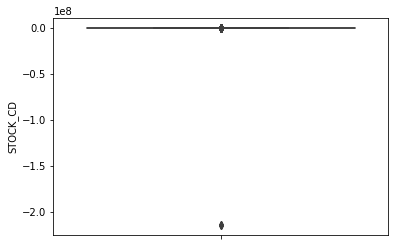

In [27]:
ay = sns.boxplot(y = Categoria_panificados['STOCK_CD'], data = Categoria_panificados)

In [28]:
Categoria_panificados.drop(['CAT3','SUB_CAT3','LECTURA','DIASEMANAL'], axis='columns', inplace=True)

C:\Users\gabri\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
np.shape(Categoria_panificados)

(1756, 19)

In [30]:
Categoria_panificados.replace({'IDROTACION': "A"}, int(3), inplace=True)
Categoria_panificados.replace({'IDROTACION': "B"}, int(2), inplace=True)
Categoria_panificados.replace({'IDROTACION': "C"}, int(1), inplace=True)

C:\Users\gabri\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [31]:
Categoria_panificados.loc[Categoria_panificados['STOCK_CD'] < 0 , 'STOCK_CD'] = 0

C:\Users\gabri\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


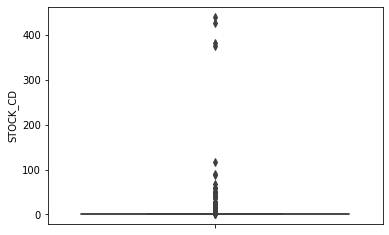

In [32]:
ay2 = sns.boxplot(y = Categoria_panificados['STOCK_CD'], data = Categoria_panificados)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c5e166e08>,
 'caps': [<matplotlib.lines.Line2D at 0x24c5e171f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c5e16d808>],
 'medians': [<matplotlib.lines.Line2D at 0x24c5e176f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c5e176fc8>],
 'means': []}

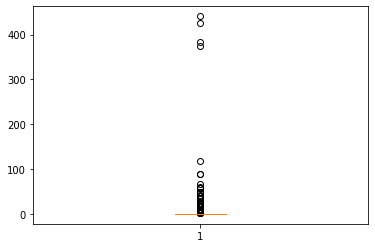

In [33]:
plt.boxplot(Categoria_panificados['STOCK_CD'])  

In [34]:
Categoria_panificados.to_excel(r'C:\Users\gabri\Desktop\Ciencia de datos\Panificados 2019\Categoria panificados.xlsx')